# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')

import os

In [5]:
path = os.getcwd()

In [6]:
train = pd.read_csv(path + "\\Train.csv")
test = pd.read_csv(path+"\\Test.csv")
sample_sub = pd.read_csv(path+"\\sample_submission.csv")

In [7]:
train.shape, test.shape, sample_sub.shape

((29451, 12), (68720, 11), (68720, 1))

---
## Data Description

##### POSTED_BY - Category marking who has listed the property

UNDER_CONSTRUCTION - Under Construction or Not

RERA - Rera approved or Not

BHK_NO - Number of Rooms

BHK_OR_RK - Type of property

SQUARE_FT - Total area of the house in square feet

READY_TO_MOVE - Category marking Ready to move or Not

RESALE - Category marking Resale or not

ADDRESS - Address of the property

LONGITUDE - Longitude of the property

LATITUDE - Latitude of the property


## Hypothesis Generation

1. Does house price is more when dealer is posting?
2. Does Under_Construction houses have less price?
3. Does RERA approved houses have more price?
4. Houses with greater number of rooms have more price.
5. Higher the square_ft higher the price.
6. Resale 1 have perticularly less price.

---
# EDA

Lets go and explore our training and test datasets. We will do the following steps:

1. Brief Look at the Dataset
2. See the shape of Dataset. Variables and Target column
3. Target Distribution
4. See the variables datatypes
5. See The Number/Percentage Of Missing values
6. Unique Values in each Variable

### 1. Brief Look at the Dataset

In [8]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [9]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
UNDER_CONSTRUCTION,29451.0,0.179756,3.839908e-01,0.000000,0.000000,0.000000,0.000000,1.000000e+00
RERA,29451.0,0.317918,4.656753e-01,0.000000,0.000000,0.000000,1.000000,1.000000e+00
BHK_NO.,29451.0,2.392279,8.790913e-01,1.000000,2.000000,2.000000,3.000000,2.000000e+01
SQUARE_FT,29451.0,19802.170190,1.901335e+06,3.000000,900.021130,1175.056750,1550.688124,2.545455e+08
READY_TO_MOVE,29451.0,0.820244,3.839908e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
RESALE,29451.0,0.929578,2.558613e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
LONGITUDE,29451.0,21.300255,6.205306e+00,-37.713008,18.452663,20.750000,26.900926,5.991288e+01
LATITUDE,29451.0,76.837695,1.055775e+01,-121.761248,73.798100,77.324137,77.828740,1.529627e+02
TARGET(PRICE_IN_LACS),29451.0,142.898746,6.568807e+02,0.250000,38.000000,62.000000,100.000000,3.000000e+04


In [11]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
UNDER_CONSTRUCTION,68720.0,0.176557,0.381296,0.000000,0.000000,0.000000,0.000000,1.000000e+00
RERA,68720.0,0.316531,0.465126,0.000000,0.000000,0.000000,1.000000,1.000000e+00
BHK_NO.,68720.0,2.388198,0.864577,1.000000,2.000000,2.000000,3.000000,3.100000e+01
SQUARE_FT,68720.0,2762.418558,164099.148524,1.000000,900.031031,1174.981923,1550.264643,4.016393e+07
READY_TO_MOVE,68720.0,0.823443,0.381296,0.000000,1.000000,1.000000,1.000000,1.000000e+00
RESALE,68720.0,0.933498,0.249159,0.000000,1.000000,1.000000,1.000000,1.000000e+00
LONGITUDE,68720.0,21.288045,6.179034,-38.391261,18.452663,20.933260,26.888396,6.518333e+01
LATITUDE,68720.0,76.919388,10.100950,-118.354100,73.798100,77.324966,78.000723,1.752780e+02


### 2. See the shape of Dataset. Variables and Target column

In [12]:
print(f'The shape of Train Dataset is {train.shape}')
print(f'The shape of Test Dataset is {test.shape}')

target = 'TARGET(PRICE_IN_LACS)' # Target Variable

features = [col for col in train.columns if col not in [target]] # Features

print(f'\nThe Dataset have total {len(features)} features')

The shape of Train Dataset is (29451, 12)
The shape of Test Dataset is (68720, 11)

The Dataset have total 11 features


### 3. Target Distribution

In [13]:
pd.DataFrame(train[target].describe())

,TARGET(PRICE_IN_LACS)
count,29451.000000
mean,142.898746
std,656.880713
min,0.250000
25%,38.000000
50%,62.000000
75%,100.000000
max,30000.000000


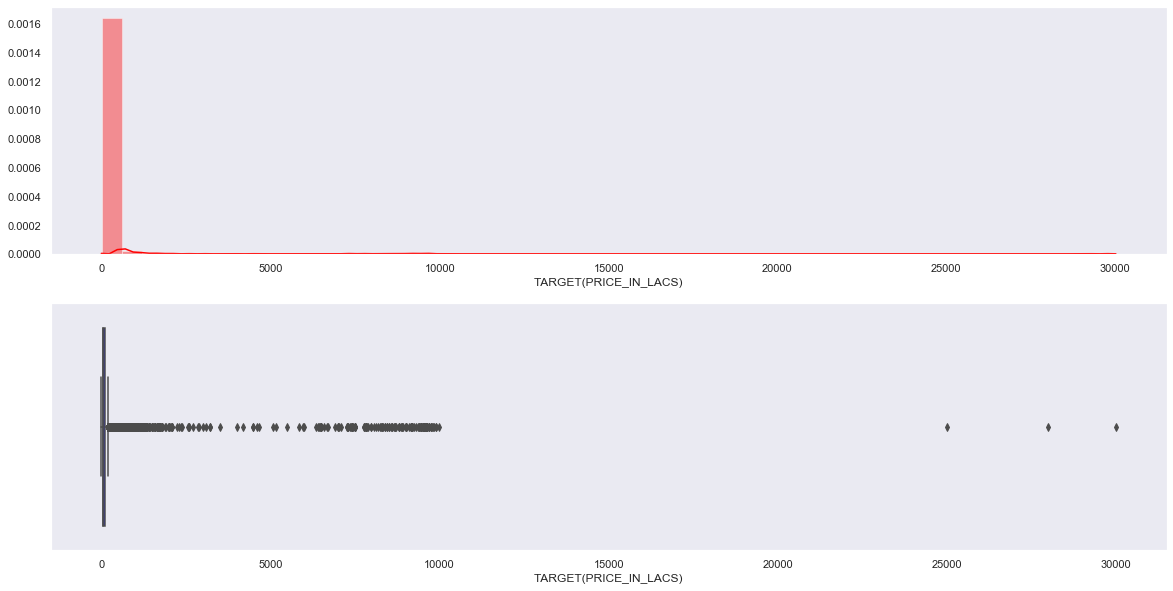

In [14]:
f,ax = plt.subplots(2,1,figsize=(20,10))
axx = ax.flatten()

sns.distplot(train[target],ax = axx[0], color='Red')
sns.boxplot(train[target],ax = axx[1], color='Blue')

* We have highly left skewed data in target variable.

### 4. See the variables datatypes.

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


### 5. See The Number/Percentage Of Missing values

In [16]:
train.isna().sum().sum()

0

In [17]:
test.isna().sum().sum()

0

### 6. Unique Values in each Variable

In [18]:
pd.concat((train.nunique(), test.nunique()), axis = 1)

,0,1
POSTED_BY,3,3.0
UNDER_CONSTRUCTION,2,2.0
RERA,2,2.0
BHK_NO.,16,17.0
BHK_OR_RK,2,2.0
SQUARE_FT,19561,37704.0
READY_TO_MOVE,2,2.0
RESALE,2,2.0
ADDRESS,6899,11048.0
LONGITUDE,4087,5907.0


* There is one Bhk_No is less in train than test

---
# Univariate Analysis

### 1. Pie Plots for categorical Variables

In [19]:
cat_ls = ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'READY_TO_MOVE', 'RESALE']

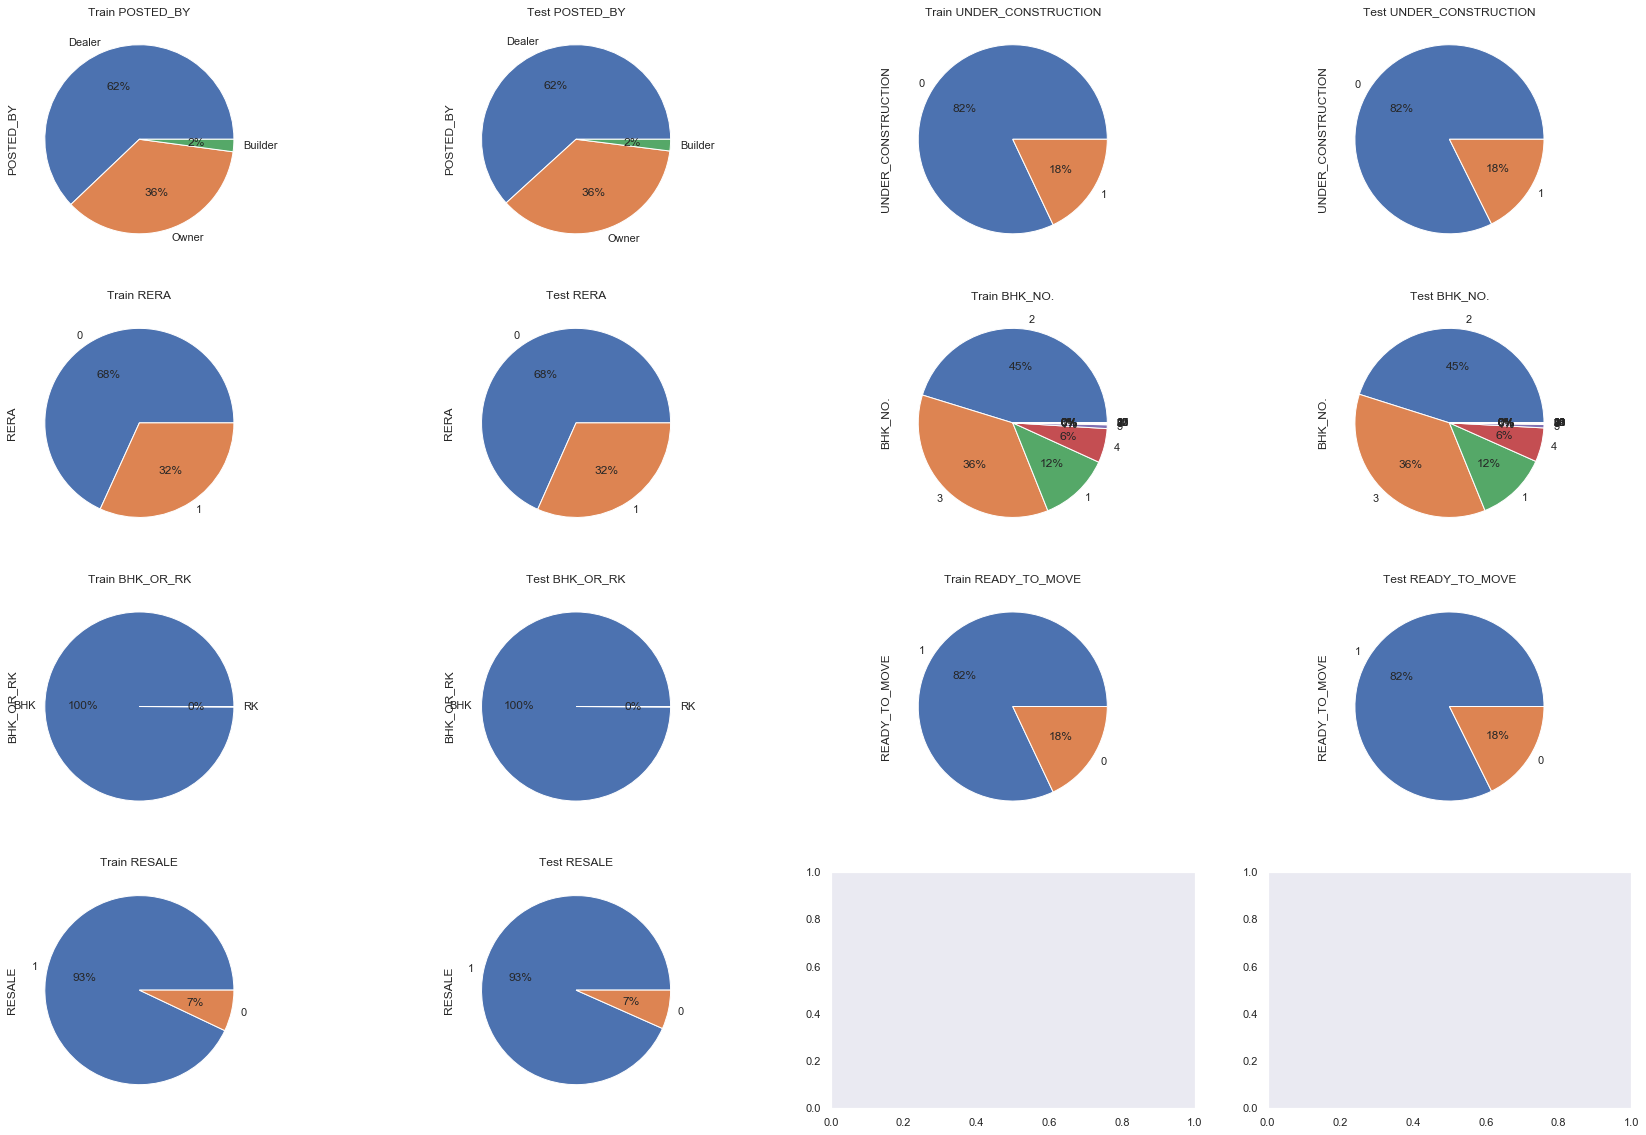

In [25]:
f, ax = plt.subplots(4,4,figsize = (30,20))
axx = ax.flatten()

index = 0
for column in cat_ls:
    # train[column].value_counts().plot(kind='pie', ax = axx[index], title=column, autopct='%.0f', fontsize=12)
    train[column].value_counts().plot.pie(autopct = '%1.0f%%', title='Train '+column, ax = axx[index])
    index+=1
    test[column].value_counts().plot.pie(autopct = '%1.0f%%', title='Test '+column, ax = axx[index])
    index+=1

### 2. Bar plots for categorical variables

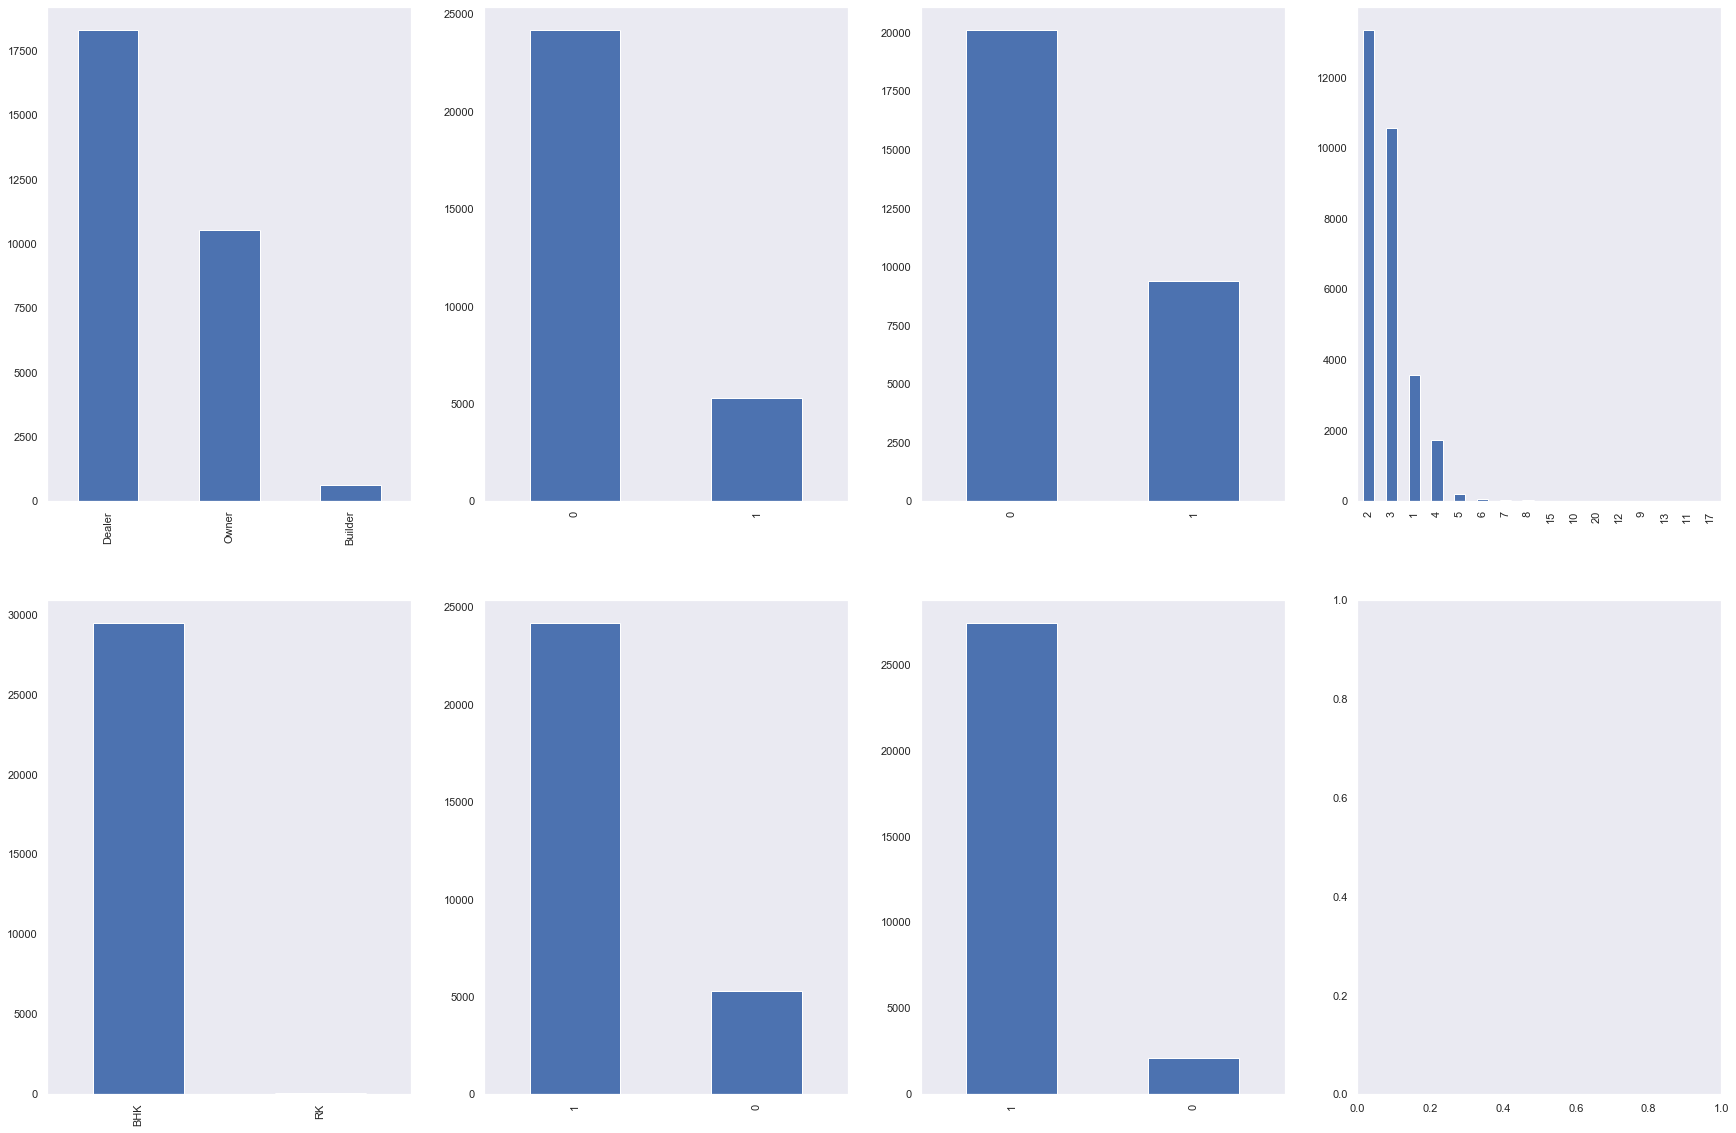

In [26]:
f, ax = plt.subplots(2,4,figsize = (30,20))
axx = ax.flatten()

index = 0
for column in cat_ls:
    # train[column].value_counts().plot(kind='pie', ax = axx[index], title=column, autopct='%.0f', fontsize=12)
    train[column].value_counts().plot.bar( ax = axx[index])
    index+=1

#### Insights:

* The distribution of every variable is same in both train and test data.
* Most of the houses are posted by Dealer (62%). Very few (2%) are posted by Builders.
* Only 18% of Houses are Under Construction.
* Most of the houses (45%) have 2 rooms. followed by 3, 1 and 4. 
* Almost all the houses are BHK.

### 3. Kdeplots, Distplot, Boxplot for Numerical Variables

In [22]:
num_ls = ['SQUARE_FT']

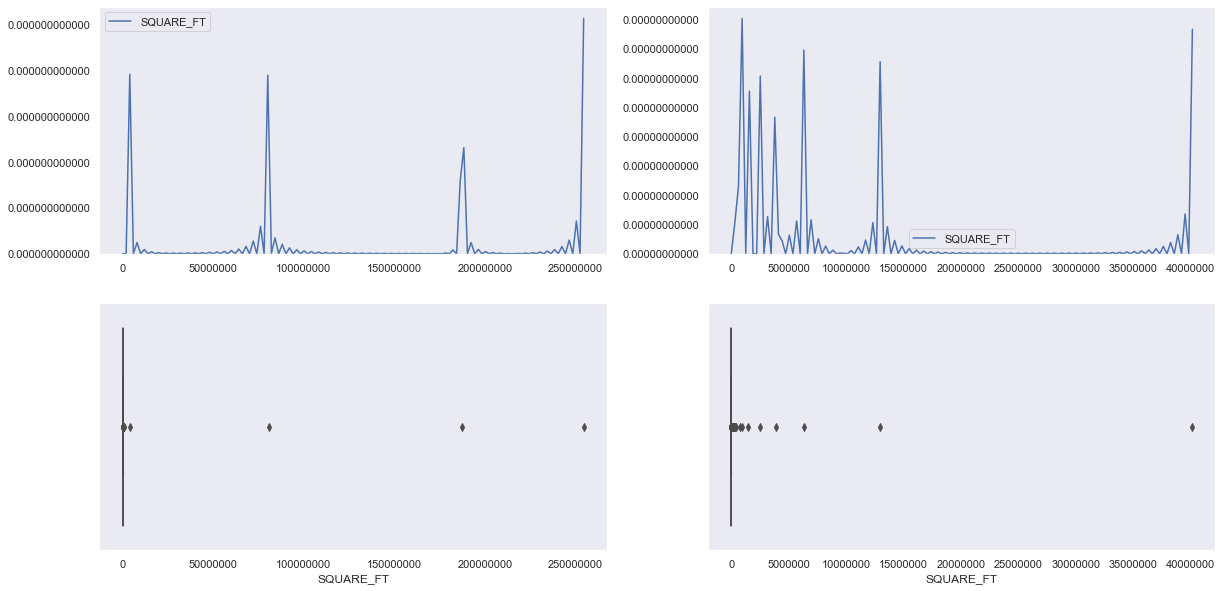

In [52]:
f, ax = plt.subplots(2, 2, figsize=(20, 10))
axx = ax.flatten()


sns.kdeplot(train['SQUARE_FT'], ax = axx[0])
axx[0].ticklabel_format(style = 'plain')
sns.kdeplot(test['SQUARE_FT'], ax = axx[1])
axx[1].ticklabel_format(style = 'plain')
sns.boxplot(train['SQUARE_FT'], ax = axx[2])
axx[2].ticklabel_format(style = 'plain', axis = 'x')
sns.boxplot(test['SQUARE_FT'], ax = axx[3])
axx[3].ticklabel_format(style = 'plain', axis = 'x')

* Square_ft is highly left skewed. 
* Almost all the houses have Square_ft below 400000.

---
# Bivariate Analysis

### 1. Boxplots for categorical Variables

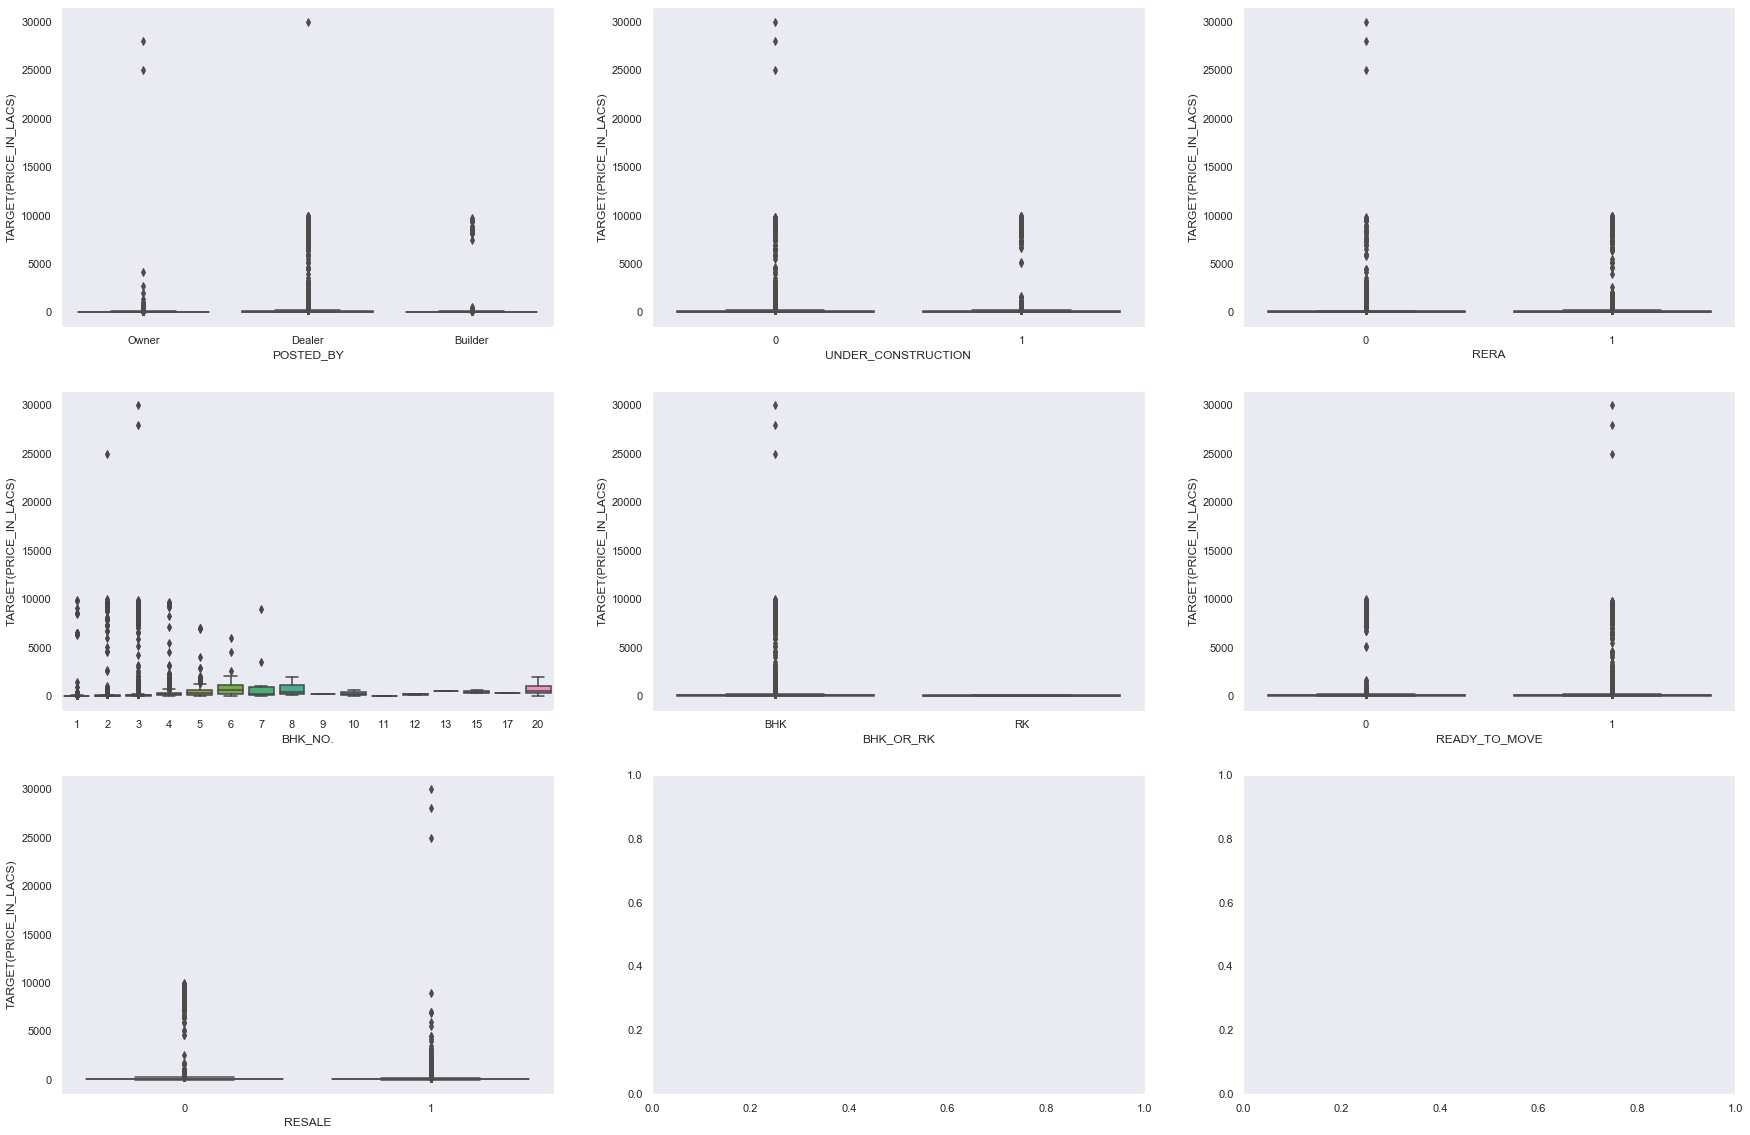

In [24]:
f, ax = plt.subplots(3,3,figsize = (30,20))
axx = ax.flatten()

for index, column in enumerate(cat_ls):
    sns.boxplot(data = train, x = column, y = target, ax = axx[index])

### 2. Scatterplot for Numerical Column

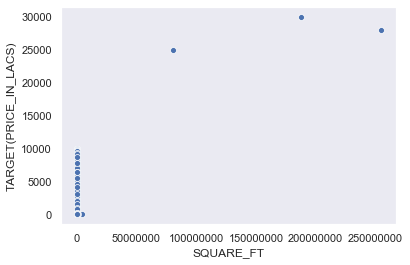

In [30]:
plt.ticklabel_format(style = 'plain')
sns.scatterplot(data = train, x = 'SQUARE_FT', y = target)

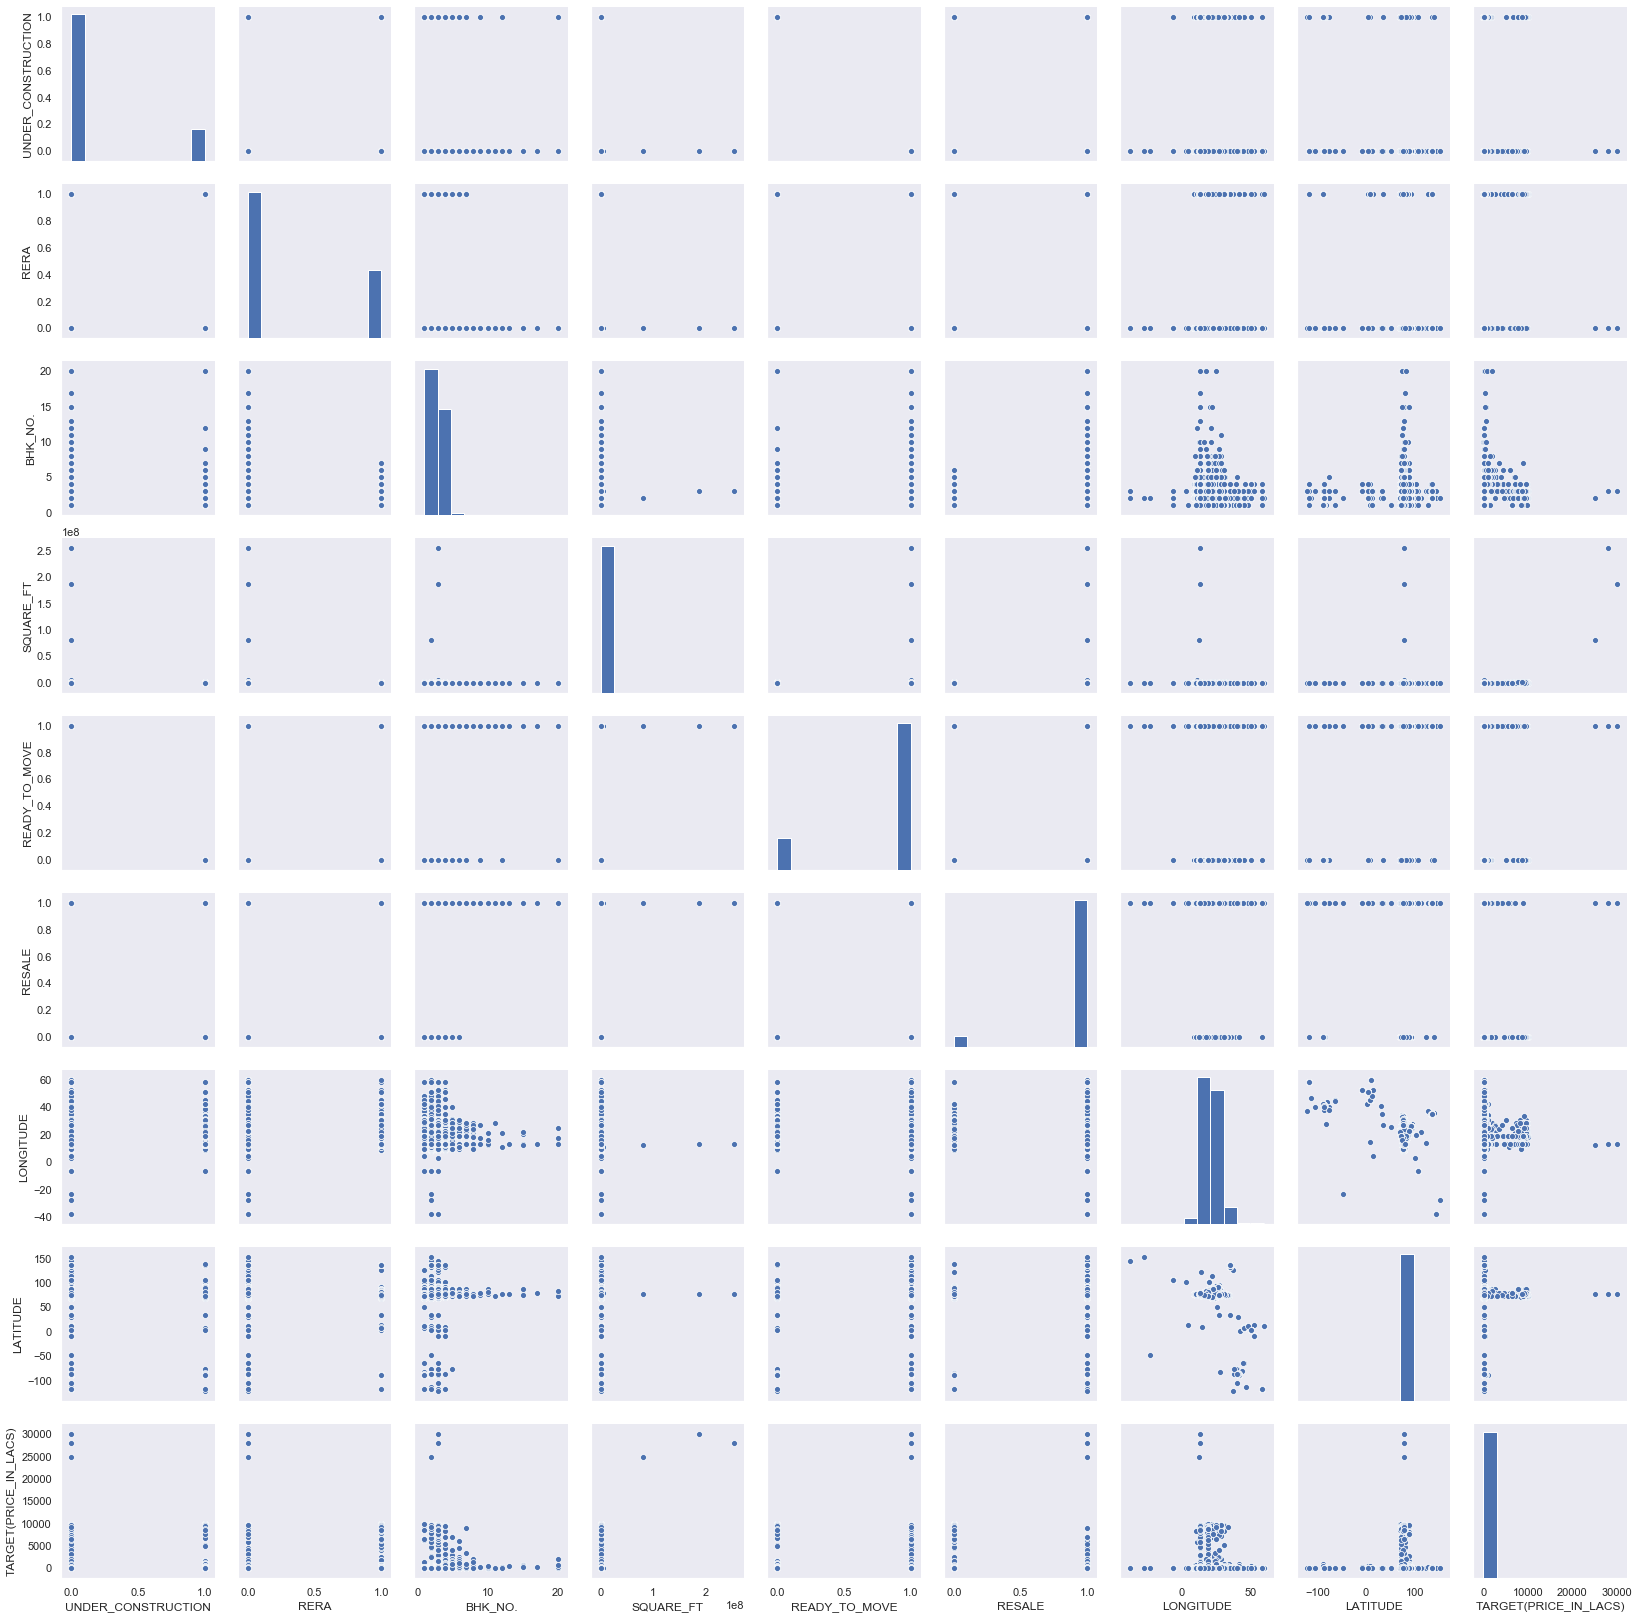

In [130]:
sns.pairplot(data = train)

---
# Hypothesis Testing

1. Does house price is more when dealer is posting?
2. Does Under_Construction houses have less price?
3. Does RERA approved houses have more price?
4. Houses with greater number of rooms have more price.
5. Higher the square_ft higher the price.
6. Resale 1 have perticularly less price.
7. What are the cities with higher price rate.

### 1. Does house price is more when dealer is posting?

We will see Median price of Owner, Dealer and Builder. We are choosing median becuase it's less affected by Outliers since our data has so much outliers.

Answer:

    Yes. House's price is way higher when dealer is posting it.

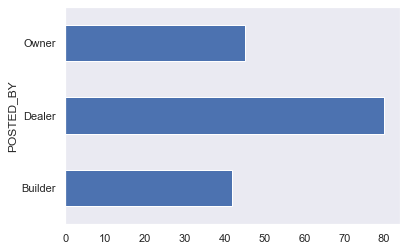

In [137]:
train.groupby('POSTED_BY')[target].median().plot(kind = 'barh')

### 2. Does Under_Construction houses have less price?

Answer:

    Yes. Under_Construction houses have slightly less price.

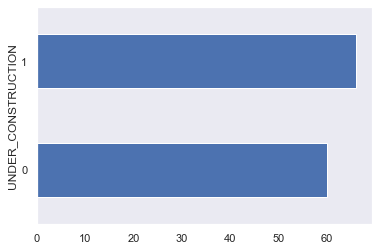

In [141]:
train.groupby('UNDER_CONSTRUCTION')[target].median().plot(kind = 'barh')

### 3. Does RERA approved houses have Higher price?

Answer:
    
    Yes. RERA approved houses have Higher price than those who do no thave.

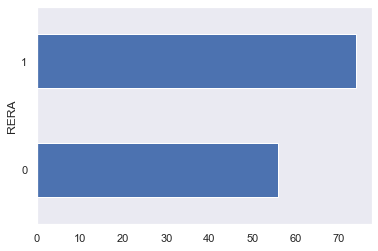

In [142]:
train.groupby('RERA')[target].median().plot(kind = 'barh')

### 4. Houses with greater number of rooms have more price.

Answer:
    
    Yes. But its not the case for all the room_numbers.

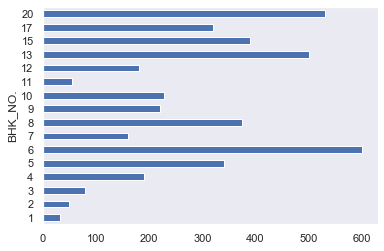

In [145]:
train.groupby('BHK_NO.')[target].median().plot(kind = 'barh')

### 5. Higher the square_ft higher the price.

Answer: 
    
    Yes. As the square feet increases the price is also increases. But its not the case for every time (Specially Square feet <50000).

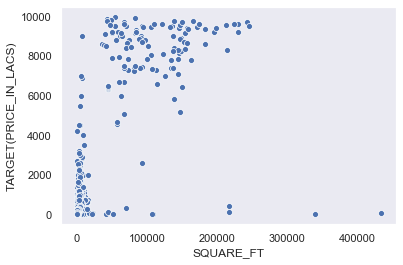

In [161]:
plt.ticklabel_format(style = 'plain')
sns.scatterplot(data = train[ train['SQUARE_FT']<500000], x = 'SQUARE_FT', y = target)

### 6. Resale 1 have perticularly less price.

Answer: 
    
    Yes. Resale 1 have slightly less price than Resale 0.

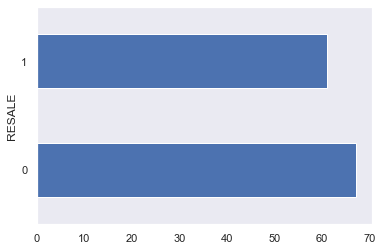

In [165]:
train.groupby('RESALE')[target].median().plot(kind = 'barh')

### 7. What are the cities with higher price rate.

In [55]:
train['City'] = train['ADDRESS'].apply(lambda x : x.split(',')[-1])

In [84]:
train.groupby('City')['TARGET(PRICE_IN_LACS)'].median().sort_values(ascending = False)[:30]

City
Cuddalore      650.00
Vidisha        320.00
Gurgaon        140.00
Hathras        140.00
Maharashtra    130.00
Nizamabad      120.00
Mumbai         120.00
Lalitpur       110.00
Srinagar        90.00
Hassan          90.00
Arrah           85.50
Bhadrak         85.00
Idukki          84.50
Panaji          82.50
Jammu           80.00
Sagar           80.00
Bangalore       77.75
Faizabad        75.00
Kottayam        72.75
Ludhiana        72.00
Phagwara        70.00
Noida           70.00
Salem           69.00
Erode           68.00
Panchkula       67.50
Kochi           67.00
Pune            67.00
Kollam          66.50
Karwar          64.50
Dehradun        63.20
Name: TARGET(PRICE_IN_LACS), dtype: float64